In [61]:
import pykat
from pykat.ifo import aligo
import pykat.ifo.aligo.plot
import matplotlib.pyplot as plt
import numpy as np

pykat.init_pykat_plotting()

In [111]:
kat_code_XARM_only = """
l L0 125 0 n0
s lmod1 1 n0 n1
mod mod1 $f1 0.18 1 pm n1 n2
s lmod2 1 n2 n3
mod mod2 $f2 0.18 1 pm n3 n4
s lmod3 1 n4 n5

# Thermal lens correction
lens ITMXTL $TL_f n5 nITMXTLtrans
s ITMXtl_null 0 nITMXTLtrans nITMXconstL_in
lens ITMXconstL inf nITMXconstL_in nITMXconstL_trans

s ITMXTL_null2 0 nITMXconstL_trans nITMX1

# X arm input mirror
m2 ITMXAR 20u 0 $phi_ITMX nITMX1 nITMXs1
s ITMXsub 0.2 $nsilica nITMXs1 nITMXs2
m1 ITMXHR 0.014 $Mloss $phi_ITMX nITMXs2 nITMX2
#m1 ITMXHR 0 $Mloss $phi_ITMX nITMXs2 nITMX2
attr ITMXHR Rc -1934

# X arm length
s LXarm 3994.5 nITMX2 nETMX1

# X arm end mirror
m1 ETMXHR 5u $Mloss $phi_ETMX nETMX1 nETMXs1
s ETMXsub 0.2 $nsilica nETMXs1 nETMXs2
m2 ETMXAR 500u 0 $phi_ETMX nETMXs2 nPTX
attr ETMXHR Rc 2245

pd1 South $fs nITMX1
pd1 ref1 $f2 0 nITMX1 
pd1 ref2 $f2 90 nITMX1

const Mloss 37.5u
const phi_ITMX 0
const phi_ETMX 0

const TL_f 34.5k

const nsilica 1.44963098985906

const f1 9.099471M
const nf1 -9.099471M
const f2 45.497355M
const nf2 -45.497355M

#cav cavPRX PRMHR nPRMHRb ITMXHR nITMXs2
cav cavXARM ITMXHR nITMX2 ETMXHR nETMX1

maxtem 4
"""

vary_end = """
xaxis ETMXHR phi lin -90 90 100 % changing the microscopic position of ETMX
"""
lock="""
set err ref2 re
lock z $err -1 1m
put* ITMXHR phi $z
"""


In [109]:
### Find the gaussian beam parameter at the first optic
basekat = pykat.finesse.kat() 
basekat.parse(kat_code_XARM_only)
basekat.parse(vary_end)
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out_trace = kat.run()

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


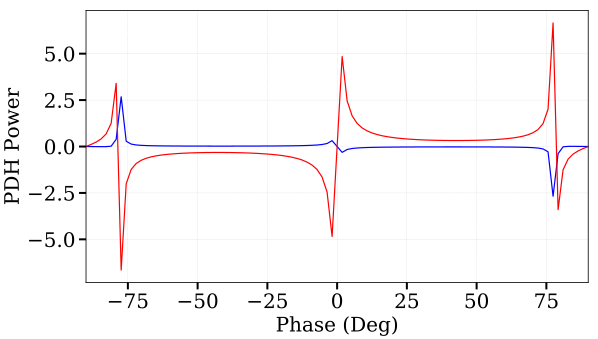

In [110]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
pl.plot(out_trace.x,out_trace['ref1'])
pl.plot(out_trace.x,out_trace['ref2'])
pl.legend(fontsize=15)

pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("PDH Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


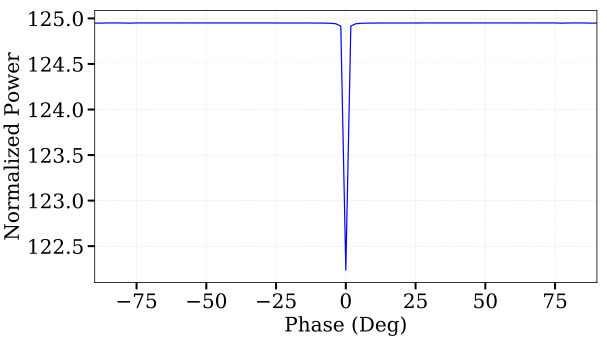

In [112]:
pl.figure(figsize=(9, 5), dpi=80)

pl.subplot(111)
pl.plot(out_trace.x,out_trace['South'])
pl.legend(fontsize=15)

pl.xlabel("Phase (Deg)",fontsize=20)
pl.ylabel("Normalized Power",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)

pl.show()